Previous: [P0 Bay Area Bike Share Analysis](https://github.com/federicomariamassari/udacity-dand/blob/master/projects/p0/dand-p0-bay-area-bike-share-analysis.md) | [Table of Contents](https://github.com/federicomariamassari/udacity-dand/blob/master/README.md) | Next: [P2 Investigate a Dataset](../p2/dand-p2-investigate-a-dataset.ipynb) 

# Data Analyst Nanodegree: P1 Compute Statistics from Card Draws
__Federico Maria Massari / federico.massari@bocconialumni.it__
> Compute descriptive statistics from a card-drawing task. The project is connected to the course [_Introduction to Descriptive Statistics_](https://www.udacity.com/course/intro-to-descriptive-statistics--ud827) and is developed in Python.

> Libraries: Python 3.6.2, NumPy 1.13.1, SciPy 0.19.1, Matplotlib 2.0.2, Seaborn 0.8.1. Previous versions of the packages may still produce the desired output.

> __Keywords__: Descriptive Statistics, Distribution of a Random Variable, Central Limit Theorem, Python.

## Project Overview

In this project, you will demonstrate your knowledge of descriptive statistics by conducting an experiment dealing with drawing from a deck of playing cards and creating a write up containing your findings.

The experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits, {spades ♠, hearts ♥, diamonds ♦, and clubs ♣}, each suit containing thirteen cards: Ace, numbers 2-10, and face cards Jack, Queen, and King.

For the purposes of this task, assign each card a value: the Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.

You will do the following:

- __Distribution of Card Values__: In this section, you will create a histogram depicting the relative frequencies of the card values for a single draw, and report the mean, median, and standard deviation of the value distribution.


- __Generate Data__: In this section, you will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. You will be sampling from the deck without replacement. Record the cards that you have drawn and the sum of the three cards’ values. Replace the drawn cards back into the deck and repeat this sampling procedure a total of at least thirty times. Take a look at the distribution of the three-card sums from the samples that you obtained and report descriptive statistics. Include at least two measures of central tendency and two measures of variability.


- __Comparison__: Compare the shape of the histogram of the sampled three-card sums with that of the original distribution. How are they different, and can you explain why this is the case?


- __Confidence Intervals__: Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

__Note__: This project is self-assessed and does not require submission. It is a _Jupyter notebook_ with Python 3.6 gists.

## Preliminary Task: Import Libraries, Define Core Functions

Import the required Python libraries. Commands preceded by `%` are IPython only magic commands: `%matplotlib inline` embeds plots in the notebook; `%config InlineBackend.figure_format = 'retina'` makes them high-resolution.

In [1]:
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Deck Setup

Define a `deck` function which creates separate lists of suits and card values for later use. The function requires no input.

In [2]:
def deck():
    """Initialise a deck of cards and return lists of suits and card values."""
    
    suits = ['clubs', 'diamonds', 'hearts', 'spades']
    cards = ['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']
    
    return suits, cards

### Card Draw, Single Hand

Define a card-drawing function, `draw`, which randomly associates a suit with a card value. The function has two arguments:

- `n_cards`: integer, required argument. The number of cards to draw.
- `replacement`: Boolean, optional argument. By default, set to `False` (no card replacement).

The function behaves differently based on whether the card picked is then replaced in the deck:

- if __`replacement` is omitted__, the function initialises the `hand` to the empty _set_; a `set` in Python is _"an unordered collection of unique and immutable objects"_ `[1]`, so that no two same cards can belong to it. A card is then added to the `hand` as a random `tuple`, an immutable pair of a suit and a value, e.g. `('hearts','A')`, or `(('hearts','A'))` if we see it inside the set. Obviously, the maximum number of cards to be drawn from a single deck without replacement is 52, so the function will raise a `ValueError` if `n_cards` > 52 (or 4 \* 13, which is `len(suits)` \* `len(cards)`);


- if __`replacement` is set to `True`__, the function initialises the `hand` to the empty _list_; for our purpose, a `list` in Python is _"a positionally ordered collection of repeatable and mutable objects"_, so that the same card can belong to it as many times as required. A card is then added to the `hand` as a random tuple inside the `hand` list, e.g. `[('hearts','A')]`. The maximum number of cards to be drawn from a single deck, if the cards are replaced, is infinite, so no `ValueError` will raise if `n_cards` > 52.

In [3]:
def draw(n_cards, replacement=False):
    """Draw up to n unique cards from a deck with or without replacement.
    
    Randomly draw n unique cards from a standard deck until the desired number 
    (n_cards) is reached.

    Arguments:
        n_cards --- int. A non-negative integer in [0, 52] if 'replacement' is 
            omitted or False. A non-negative integer in [0, Inf) otherwise.

    Keyword arguments:
        replacement -- bool. If True, allow for duplicate cards (default False).
    """
    
    # If replacement is True, the same card can be picked multiple times
    if replacement:
        
        # Initialise hand to the empty list (no card picked yet)
        hand = []
        
        # Append a random card to the hand
        while len(hand) < n_cards:
            hand.append((random.choice(suits), random.choice(cards)))
    
    else:
        
        # Initialise hand to the empty set (no card picked yet)
        hand = set()
        
        # Add n unique cards to the hand, if n is less than or equal to total
        # deck size (52)
        if n_cards > len(suits) * len(cards):
            raise ValueError('Not enough cards in the deck.')
        else:
            while len(hand) < n_cards:
                hand.add((random.choice(suits), random.choice(cards)))
    
    return hand

### Value Assignment

Define a `card_values` function to convert special cards into values. Ace is given value 1, Jack, Queen, and King value 10. The function has one argument:

- `hand`: list or tuple, required argument. Output of the function `draw`.

The function uses the elegant _list comprehension_ `[1]`, `[2]`, `[3]`. The first line of code retrieves the `value` from each `(suit, value)` combination in the hand, e.g. returns `['A']` for the `('hearts','A')` drawn card. Note that, at this point, the values have not been converted yet. The second line converts all special cards to values, and leaves ordinary card values unaltered. It reads: "_give me value 10 if the card is one among Jack, Queen, and King; give me 1 if the card is Ace, and just return the value otherwise_".

In [4]:
def card_values(hand):
    """Extract card values from drawn cards.
    
    Extract values out of all cards in the hand. Assign numerical value to 
    special cards: 'A' = 1, {'J', 'Q', 'K'} = 10. Return value for all others.

    Arguments:
        hand -- list or tuple. Output of the function 'draw'.
    """
    
    # Extract card values
    card_values = [value for (suit, value) in hand]
    
    # Convert special card names to values
    card_values = [10 if value in ('J', 'Q', 'K') else 1 if value == 'A' \
                   else value for value in card_values]
    
    return card_values

### Card draws, $k$ hands

Define a `hands` function which randomly draws $n$ cards, accounting for replacement, if applicable, and repeats the process $k$ times. The function has input:

- `n_cards`: integer, required argument. The number of cards to draw.
- `k_hands`: integer, required argument. The number of hands, or experiment repetitions.
- `replacement`: Boolean value, optional argument. Input for the called function `draw`. Default value is `False`.

The function builds on `draw` and `card_values` and uses list comprehension to create a list of sub-lists. The list collects $k$ individual sub-lists of length $n$: $k$ hands, containing $n$ cards each. By construction, the function already converts special cards to values, but does not sum the latter (the function `sum_hands` does this).

In [5]:
def hands(n_cards, k_hands, replacement=False):
    """Draw n cards with or without replacement for each of k hands.
    
    Randomly draw n cards from the deck until the desired number is reached.
    Repeat the step k times to obtain k distinct hands. Return already converted 
    card values. If 'replacement' is omitted or False, the cards are drawn 
    without replacement (maximum no. of cards to pick: 52). Otherwise, the cards 
    are drawn with replacement (maximum no. of cards to pick: Inf).
    
    Arguments:
        n_cards -- int. An integer in [0, 52] if 'replacement' is omitted. 
            Else, an integer in [0, Inf).
        k_hands -- int. A non-negative integer, the number of hands (i.e., 
            experiment repetitions).

    Keyword arguments:
        replacement -- bool. If True, replace the card in the deck after draw 
            (default False)
    """
    
    # For each of the k hands draw n cards (with or without replacement) and 
    # compute their values
    if replacement:
        hands = [card_values(draw(n_cards, True)) for hand in range(k_hands)]
    else:
        hands = [card_values(draw(n_cards)) for hand in range(k_hands)]
    
    return hands

### Sum of $k$ hands

Define a `sum_hands` function to sum, using list comprehension, the card values in each of the $k$ hands previously obtained. The function has a single input:
 - `hands`: list of lists, required argument. Output of the function `hands`.

The function returns `sum_hands`, a list of length $k$ containing the sums of card values in the $k$ hands. The list comprehension reads: "_give me the sum, for each of the $k$ hands provided_".

In [6]:
def sum_hands(hands):
    """Sum card values for each of the k hands.

    Return the sum of the card values, for each of the k hands provided.
    
    Arguments:
        hands -- list of lists. Output of the function 'hands'.
    """
    
    # Give me the sum, for each of the hands provided
    sum_hands = [sum(hand) for hand in hands]
    
    return sum_hands

### Histogram 

Define a `histogram` function to plot the empirical distribution of all card values in the hand. The function has the following arguments:

- `values`: list, required argument. Output of either of the two functions: `card_values`, `sum_trials`.
- `title`, `xlabel`, `ylabel`: strings, required arguments. Title and x- and y- labels of the plot.
- `step`: integer, optional argument. The width of each histogram bin. Default value is 1.
- `rotation`: integer, optional argument. `xticklabels` rotation, in degrees. Default value is 0. A common alternative is 90.
- `density`: Boolean value, optional argument. Default value is `False`. If `True`, a Gaussian probability density function is fit to the histogram data.
- `normalised`: Boolean value, optional argument. Default value is `False`. If `True`, bin height is scaled so that the total sum is equal to 1. Automatically set to `True` if density is also `True`, to ensure correct plot visualisation.

The function groups data into bins of width `step` (default is one unit) ranging from 0 to the maximum value provided, with minor adjustments to center the bins and view the histogram correctly. Some basic information such as the title or the axes labels are left to the user to ensure the greatest possible function generalisation.

In [7]:
def histogram(values, title, xlabel, ylabel, step=1, rotation=0, density=False,
              normalised=False):
    """Plot the empirical distribution of card draws.

    Arguments:
        values -- list. Output of either of the two functions: 'card_values',
            'sum_trials'.
        title, xlabel, ylabel -- str. Title and x- and y- labels of the plot.

    Keyword arguments:
        step -- int. Set bin width (default 1).
        rotation -- int. Rotate xticklabels, in degrees. A common alternative
            is 90 (default 0).
        density -- bool. If True, fit a Gaussian pdf to the histogram data
            (default False).
        normalised -- bool. If True, normalise the histogram so that total area
            is equal to 1 (default False).
    """
    
    # Define figure size and Axes class (use object-oriented methods)
    plt.figure(figsize=(8, 8))
    ax = plt.axes()
    
    # If True, fit a Gaussian density to data and plot it against the histogram
    if density:
        
        # Automatically normalise the histogram to ensure correct density 
        # visualisation
        bins = np.arange(0, np.max(values) + 2, step) - 0.5 * step
        ax.hist(values, bins=bins, color='#31678dff', edgecolor='k', 
                normed=True)

        # Retrieve density parameters mu and sigma from input data
        mu, sigma = stats.norm.fit(values)
        
        # Generate x-axis values for the density, set to 1000 to ensure 
        # smoothness
        x = np.linspace(np.min(values) - 0.5 * step, np.max(values) \
            + 0.5 * step, 1000)
        
        # Generate density values for each provided x-axis value
        y = mlab.normpdf(x, mu, sigma)
        
        # Plot the density over the histogram
        density = ax.plot(x, y, color='#5cc863ff')
        
    else:
        
        # Return either normalised or non-normalised histogram, based on user 
        # input
        bins = np.arange(0, np.max(values) + 2, step) - 0.5 * step
        ax.hist(values, bins=bins, color='#31678dff', edgecolor='k', 
                normed=normalised)
        
    # Add title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Define x-axis limits
    ax.set_xlim(np.min(values) - 0.5 * step, np.max(values) + 0.5 * step)
    
    # Set x-axis ticks and rotate labels, if applicable
    xticks = np.arange(np.min(values), np.max(values) + 1, step)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=rotation)

### Basic Statistics

Define a `statistics` function which provides basic measures of location, scale, and shape of the distribution:

- __location__: _mean_ and _median_
- __scale__: _standard deviation_ and _interquartile range_, two measures of the degree of dispersion of data around a central value
- __shape__: _skewness_ and _excess kurtosis_, two measures of, respectively, the degree of asymmetry and tail fatness of a distribution

The function has the following inputs:

- `draws`: list, required argument. The output of either the function `card_values` or the function `sum_trials`.
- `df`: integer, optional argument. Number of degrees of freedom. Default value is 0. Input 1 for Bessel's correction of sample standard deviation.
- `sample_bias`: Boolean value, optional argument. Sample bias correction for skewness and excess kurtosis. Default value is `True` which, although counterintuitive, means _no_ correction.
- `output`: Boolean value, optional argument. If set to `True`, the function returns mean and standard deviation of the data. Default value is `False`.

In [8]:
def statistics(draws, df=0, sample_bias=True, output=False):
    """Print measures of location, scale, and shape.
    
    Calculate and print useful measures of location (mean, median), scale 
    (standard deviation, interquartile range), and shape (skewness, excess 
    kurtosis).
    
    Arguments:
        draws -- list. Output of either function: 'card_values', 'sum_trials'.
   
    Keyword arguments:
        df -- int. Number of degrees of freedom. Input 1 for Bessel's correction 
            for finite samples (default 0).
        sample_bias -- bool. If False, provides sample bias correction for 
            skewness and excess kurtosis (default True).
        output -- bool. If True, the function also returns mean and standard 
            deviation of the data (default False).
    """
    
    # Measures of central tendency (location)
    mean = np.average(draws)
    median = np.median(draws)
    
    # Measures of dispersion (scale)
    standard_deviation = np.std(draws, ddof=df)
    q25, q75 = np.percentile(draws, [25, 75])

    # Measure of shape
    skewness = stats.skew(draws, bias=sample_bias)
    excess_kurtosis = stats.kurtosis(draws, bias=sample_bias)
    
    # Print statistics in a user-friendly format
    print('Mean: {:.2f}'.format(mean))
    print('Median: {:.2f}'.format(median))
    print('Standard deviation: {:.2f}'.format(standard_deviation))
    print('Skewness: {:.4f}'.format(skewness))
    print('Excess kurtosis: {:.4f}'.format(excess_kurtosis))
    print('Interquartile range: {:.0f} - {:.0f} = {:.0f}'\
          .format(q75, q25, q75 - q25))
    
    # Also return mean and standard deviation if set to True
    if output:
        return mean, standard_deviation

### Confidence Intervals

Define a `confidence_interval` function which computes the $\alpha$% confidence interval for the population mean $\mu$ when the true variance $\sigma^2$ is unknown. It uses the _Student's t distribution_ with $n$ - 1 degrees of freedom to estimate the range in which $\mu$ should fall $\alpha$% of the times in repeated experiments based on a sample of size $n$ with sample mean $\bar{x}$ and sample standard deviation $s$:

$$
\bar{x} - t_{n-1;\ 1-\frac{\alpha}{2}}\frac{s}{\sqrt{n}} \ < \ \mu < \ \bar{x} + t_{n-1;\ 1 - \frac{\alpha}{2}}\frac{s}{\sqrt{n}}
$$

The function inputs are:

- `m`: floating point number, required argument. The sample mean, output of the function `statistics`.
- `s`: floating point number, required argument. The sample standard deviation, also an output of the function `statistics`.
- `n`: integer, required argument. The sample size.
- `alpha`: floating point number, required argument. The significance level, usually a small number in the closed interval [0,1].

The function outputs nothing (`None`) and simply prints out the input and the desired confidence level.

In [9]:
def confidence_interval(m, s, n, alpha):
    """Print confidence intervals for the mean with unknown population variance.
    
    Compute and print confidence intervals for the mean when population variance
    is unknown.
    
    Arguments:
        m -- float. The sample mean, output of the function 'statistics'.
        s -- float. The sample standard deviation, also an output of the 
            function 'statistics'.
        n -- int. The sample size.
        alpha -- float. The significance level, alpha in [0, 1], e.g. 
            alpha = 0.05 for the 95% c.l.
    """
    
    # Compute one-tailed Student's t quantile with (0.5 * alpha) significance 
    # per tail, n - 1 degrees of freedom
    t = stats.t.ppf(1 - (0.5 * alpha), n - 1)

    # Compute lower and upper confidence intervals for the mean
    lower = m - t * s / np.sqrt(n)
    upper = m + t * s / np.sqrt(n)

    print('{:.0f}% confidence interval for the population mean:\n'\
          .format((1 - alpha) * 100))
    print('Sample size: {:.0f}'.format(n))
    print('Sample mean: {:.2f}'.format(m))  
    print('Sample standard deviation: {:.2f}'.format(s))
    print('\n(lower; upper) = ({:.4f}; {:.4f})'.format(lower, upper))

### Cumulative Distribution Function

Define a (MATLAB-inspired) `tcdf` function to compute Student's $t$ cumulative distribution function of random variable $X$. The function has the following arguments:

- `x`: integer or floating point number, required argument. A particular realisation $x$ of random variable $X$.
- `m`: floating point number, required argument. The sample mean, output of the function `statistics`.
- `s`: floating point number, required argument. The sample standard deviation, also an output of the function `statistics`.
- `n`: integer, required argument. The sample size.
- `upper`: boolean value, optional argument. If set to `True`, it returns the _complement_ of Student's $t$ cumulative distribution function, $1 - F(x) = \mathbb{P}(X > x)$. If omitted or set to `False`, it returns the cumulative distribution function itself, $F(x) = \mathbb{P}(X \leq x)$.

In [10]:
def tcdf(x, m, s, n, upper=False):
    """Compute Student's t cumulative distribution function (cdf).
    
    Compute Student's t cumulative distribution function, F(x) = P(X <= x).
    Compute 1 - F(x)if upper = True.
    
    Arguments:
        x -- int or float. Realisation of random variable X.
        m -- float. The sample mean, output of the function 'statistics'.
        s -- float. The sample standard deviation, output of the function 
            'statistics'.
        n: int. The sample size.
    
    Keyword arguments:
        upper: bool. If True, print 1 - F(x) = P(X >= x) (default False).
    """
    
    # If upper is set to True, compute 1 - F(x); else, compute F(x)
    if upper:
        tcdf = 1 - stats.t.cdf(x, n - 1, m, s)
        print('P(X >= %s) = %.4f'%(x, tcdf))
    else:
        tcdf = stats.t.cdf(x, n - 1, m, s)
        print('P(X <= %s) = %.4f'%(x, tcdf))

## Task 1: Distribution of Card Values

### Generate Deck

Generate two separate lists, `suits` and `cards`, to be combined into cards.

In [11]:
suits, cards = deck()

### Set Random Seed

Initialise the pseudorandom number generator to a well-defined seed. Although not optimal, the procedure allows to obtain the same exact outcome in repeated experiments. We set the random seed to `0`.

In [12]:
random.seed(0)

### Single Draw, Entire Population

Return a list of all possible card values for `52` single cards draws, without replacement in the deck. We know the value of all the cards in the deck, so we are working with a population rather than a sample.

In [13]:
single_draw = card_values(draw(52))

#### Histogram

Plot the histogram of all possible values of single-card draws. If we set `'J'` = 11, `'Q'` = 12, and `'K'` = 13, the distribution would be uniform, as each value would have $p = \frac{4}{52}$ probability of being picked from the deck. However, since we gave value 10 to such cards, 10 has now $p = \frac{16}{52}$ of being selected, or four times as much as any other value. Hence the particular L-shaped distribution.

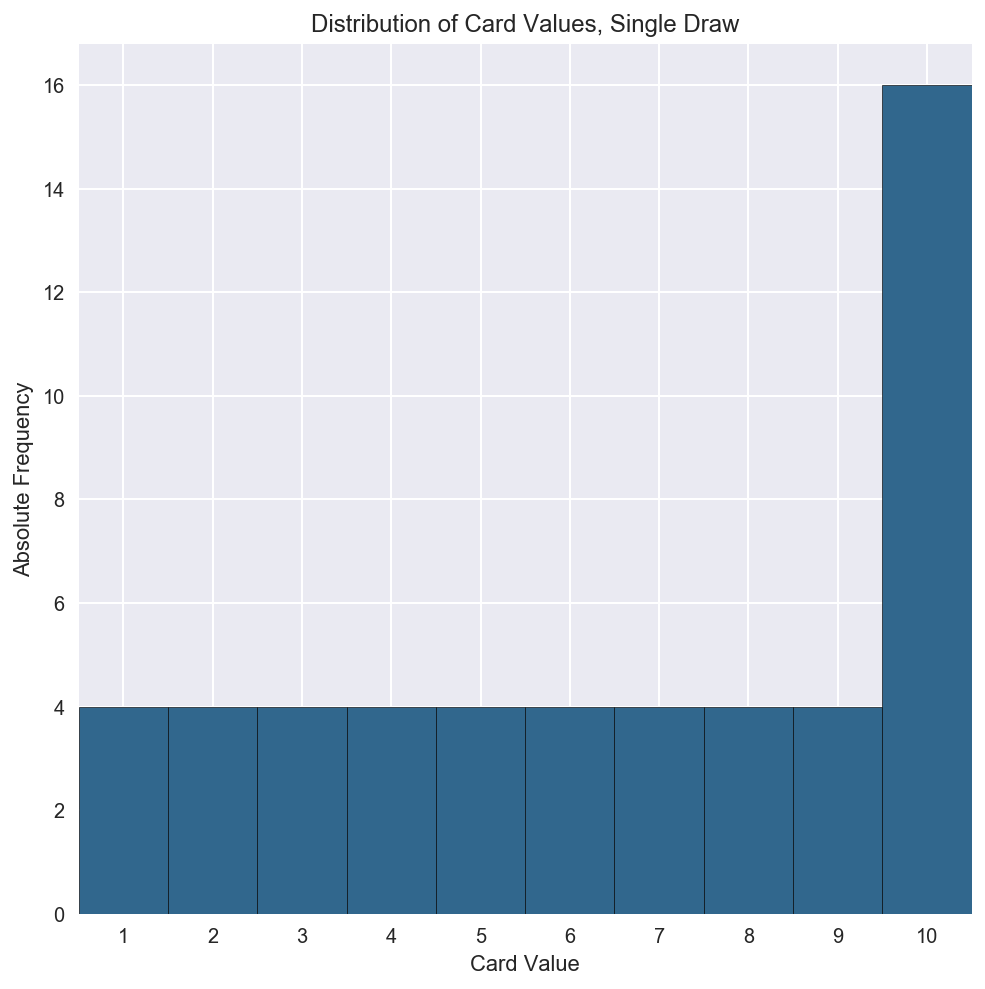

In [14]:
histogram(single_draw, 
          title='Distribution of Card Values, Single Draw', 
          xlabel='Card Value', 
          ylabel='Absolute Frequency');

#### Basic Statistics

Print basic statistics from the single-draw experiment. Since we are dealing with the population, we do not require sample bias correction for the standard deviation and the higher-order moments. Hence, `df` = 0, `sample_bias` = `True`, `sample` = `False`. The distribution is obviously negatively skewed.

In [15]:
statistics(single_draw)

Mean: 6.54
Median: 7.00
Standard deviation: 3.15
Skewness: -0.3529
Excess kurtosis: -1.2993
Interquartile range: 10 - 4 = 6


## Task 2: Generate Data

### Three-Card Draws, $k$ = 30 Samples

Draw _samples_ of 3 cards out of 52, compute their sum, replace them in the deck, and repeat the process $k$ = 30 times. Each sample, or `hand`, contains _unique_ cards: no replacement occurs until the sample is fully drawn, at which point all cards are replaced in the deck.

In [16]:
k_draws = sum_hands(hands(3, 30))

#### Histogram

Plot the histogram of the $k$ sums of three-card draws. The distribution is generally less skewed than that of the single-draw experiment, thanks to the Central Limit Theorem. The theorem, normally stated to describe the sampling distribution of the mean, also works for the sum, since it is just scaling by a constant $n$, the number of data points in each sample (3 in this case).

The original formulation of the CLT assumes independence among observations that are summed or averaged. In this case, since the size of the sample (3) is small relative to that of the population (52), failing to meet the requirement is no big deal. Note that if we set $n$ = 1 and $k$ = 52 there is very little probability to retrieve the single-draw distribution analysed before: after each hand is generated, the cards are reshuffled in the deck.

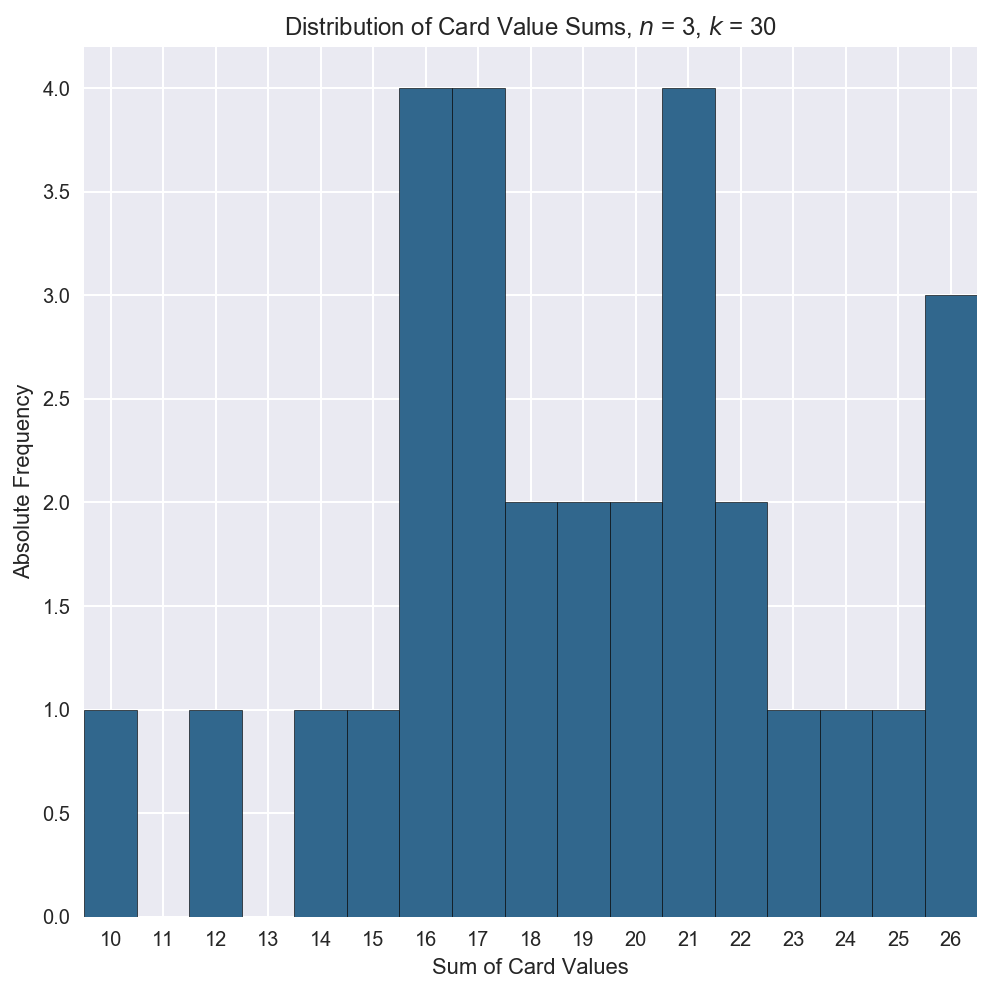

In [17]:
histogram(k_draws, 
          title='Distribution of Card Value Sums, $n$ = 3, $k$ = 30',
          xlabel='Sum of Card Values', 
          ylabel='Absolute Frequency');

#### Basic Statistics

Print basic statistics from the three-card draw experiment. This time sample bias correction is required, as we are dealing with samples of 3 out of 52 cards. We set `df` = 1, `sample_bias` = `False`. While the distribution is far from being Normal, both the standard deviation and the higher order moments are now closer to zero.

In [18]:
m, s = statistics(k_draws, df=1, sample_bias=False, output=True)

Mean: 19.17
Median: 19.00
Standard deviation: 4.09
Skewness: -0.0667
Excess kurtosis: -0.3176
Interquartile range: 22 - 16 = 6


### Three-Card Draws, $k$ = 10,000 Samples

With $k$ = 30, the distribution of three-card sums is too variable. To give it stability, we set $k$ = 10,000.

In [19]:
k_draws_large = sum_hands(hands(3, 10000))

#### Histogram

The histogram is still clearly left-skewed, with a truncated right tail and a sudden spike at 30: both the small number of cards summed per sample, $n$ = 3, and the higher frequency of cards valued 10, $\frac{16}{52}$, affect its shape. Yet, the distribution starts to resemble a Gaussian, as it is mostly bell-shaped and unimodal, with a peak at 21. By increasing the number of cards drawn per sample and lifting the _no replacement_ restriction, we can dilute the weight of ten-valued cards and obtain a Normal density.

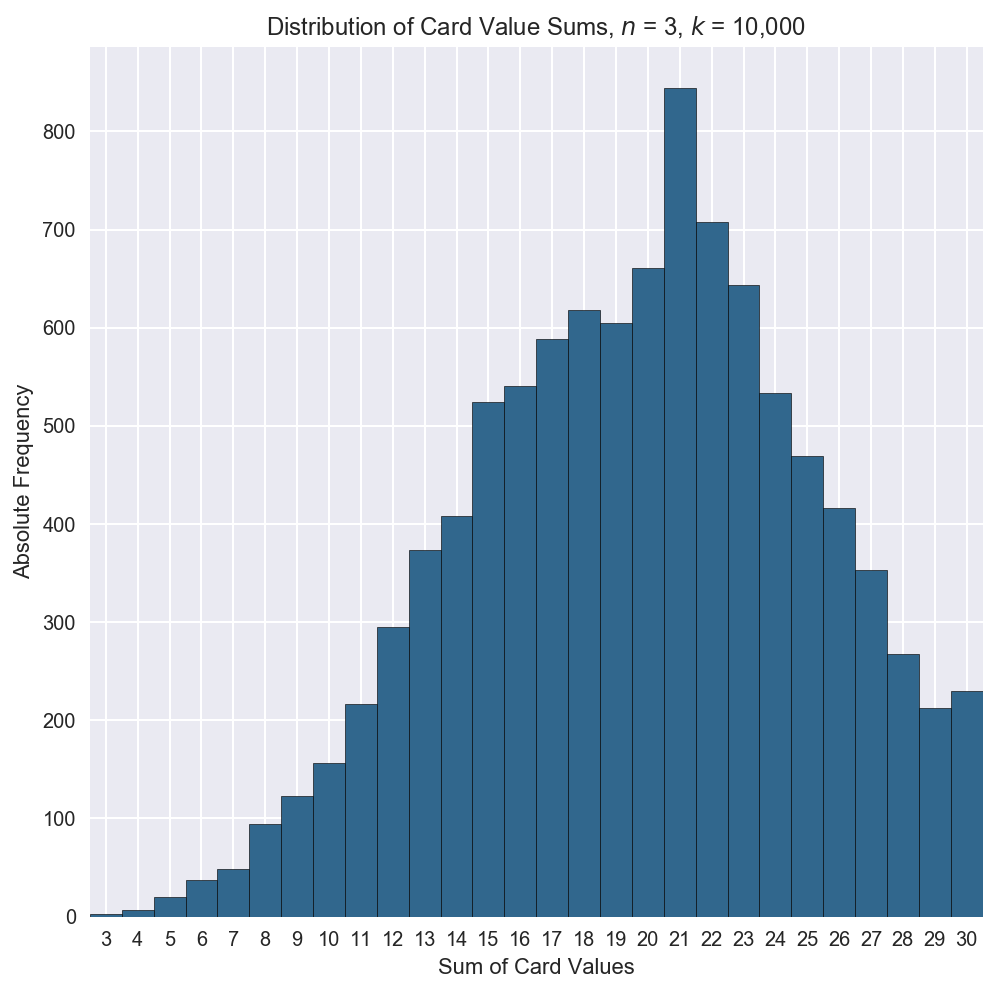

In [20]:
histogram(k_draws_large, 
          title='Distribution of Card Value Sums, $n$ = 3, $k$ = 10,000',
          xlabel='Sum of Card Values', 
          ylabel='Absolute Frequency');

#### Basic Statistics

Skewness (negative) and kurtosis still impact the shape of the distribution, but the mean and median are now starting to align.

In [21]:
statistics(k_draws_large, df=1, sample_bias=False)

Mean: 19.66
Median: 20.00
Standard deviation: 5.34
Skewness: -0.2015
Excess kurtosis: -0.4696
Interquartile range: 23 - 16 = 7


### Sampling with Replacement: $n$ = 100, $k$ = 10,000

We now set $n$ = 100, meaning, we draw a card, record its value, replace it in the deck, reshuffle, and repeat the process 100 times to generate a single hand. The latter can therefore contain the _same_ card multiple times. Then, we replace all 52 cards in the deck and do the same for the next hand, until $k$ = 10,000 of them are generated.

In [22]:
k_draws_replacement = sum_hands(hands(100, 10000, replacement=True));

#### Histogram

When the _no replacement_ restriction is lifted and both $n\to\infty$ and $k\to\infty$ the histogram is bell-shaped. The higher frequency of ten-valued cards is no more relevant, as it is diluted with replacement. A Gaussian density with $\mu$, $\sigma$ calibrated to empirical data is superimposed on the normalised histogram. Bin width is set to 10 units.

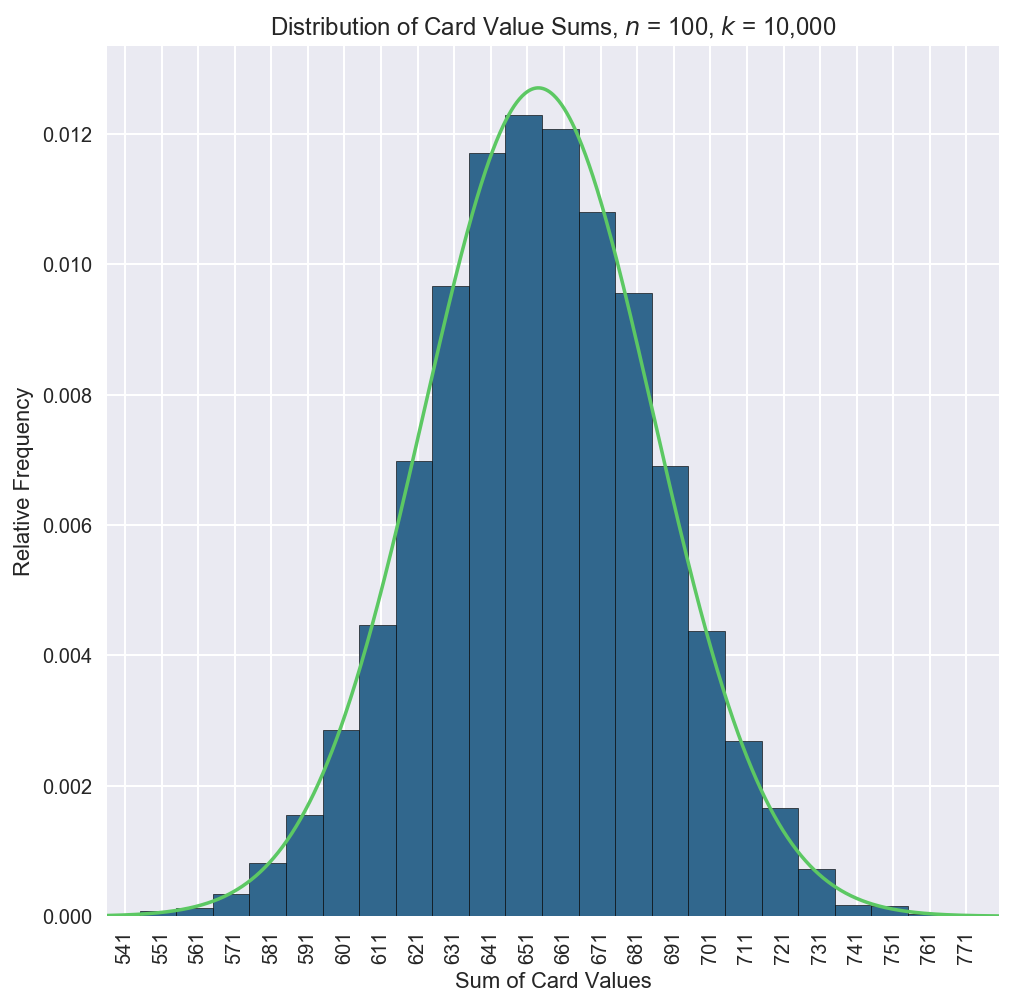

In [23]:
histogram(k_draws_replacement, 
          title='Distribution of Card Value Sums, $n$ = 100, $k$ = 10,000',
          xlabel='Sum of Card Values', 
          ylabel='Relative Frequency',
          step=10,
          rotation=90,
          density=True);

#### Basic Statistics

The distribution is roughly symmetric: the mean and the median are almost equal, the higher moments (skewness and excess kurtosis) almost zero.

In [24]:
statistics(k_draws_replacement, df=1, sample_bias=False)

Mean: 653.98
Median: 654.00
Standard deviation: 31.40
Skewness: -0.0090
Excess kurtosis: -0.0541
Interquartile range: 676 - 633 = 43


## Task 3: Comparison

When $\mathbb{P}$($X$ = 1) = ... = $\mathbb{P}$($X$ = 9) = $\frac{4}{52}$ and $\mathbb{P}$($X$ = 10) = $\frac{16}{52}$, and there is __no card replacement__ in the deck:



- the _single-draw distribution_ is left-skewed and unimodal, with a peak at $x$ = 10;

- the _three-card sum, $k$ = 30 distribution_ is generally less skewed than the previous one but wildly variable;

- the _three-card sum, $k$ = 10,000 distribution_ is stable, left-skewed, and unimodal, with a peak at 21 and a sudden spike at 30;

When there is __card replacement__:

- the _one hundred-card sum, $k$ = 10,000 distribution_ is symmetric and roughly Normal, with mean and median almost equal, and higher-order moments almost null.

## Task 4: Confidence Intervals

### Three-Card Draws, $n$ = 30 Samples

#### Confidence Interval

In repeated pseudorandom experiments, with `random.seed` set to 0, we expect the population mean $\mu$ to fall (1 - $\alpha$)% = 90% of the times within the open interval:

In [25]:
confidence_interval(m, s, n=3, alpha=0.1)

90% confidence interval for the population mean:

Sample size: 3
Sample mean: 19.17
Sample standard deviation: 4.09

(lower; upper) = (12.2783; 26.0551)


#### Probability to Get a Draw Value of At Least 20

We compute $\mathbb{P}(X \geq x \mid x = 20) = 1 - F(20)$ using the `tcdf` function defined above, setting $x$ = 20, $n$ = 3, `upper` = `True`, and retrieving the two central moments from the function `statistics`. With random seed 0, the probability of drawing three cards whose sum is at least 20, given $m$ = 19.17 and $s$ = 4.09, is roughly 42.86%:

In [26]:
tcdf(20, m, s, n=3, upper=True)

P(X >= 20) = 0.4286


#### Exact Count

With the random seed above, for $n$ = 3 and $k$ = 30 the exact frequency of values greater than of equal to 20 is $\frac{14}{30}$, approximately 46.67%:

In [27]:
x = np.array(k_draws)
print('Freq(X >= 20) = {:.4f}'.format(len(x[x >= 20]) / len(x)))

Freq(X >= 20) = 0.4667


## Conclusion

For this project, we generated a deck of cards, drew randomly from it, analysed the distributions of the outcomes, computed basic statistics and, in a special case, provided confidence intervals for the population mean when only sample moments were available, as well as the cumulative distribution function for a random variable $X$, $F(x)$, the probability of it being below a certain threshold value $x$. We started with the _no replacement_ restriction. We first drew the entire population of cards in the deck and created a histogram of single card values: since we assigned value 10 to four types of cards (10, Jack, Queen, and King), the histogram was not uniform, rather left-skewed, with four times the weight of bin 10 relative to the others. We found population mean = 6.54, median = 7, standard deviation = 3.15, and interquartile range = 6. We then reshuffled the deck and generated $k$ hands or three cards each, summed the values of the cards in each hand, and analysed the distribution of the sums. We noticed that, with only three cards per hand and k = 30 repeated experiments, the distribution was wildly variable. At higher frequency, $k$ = 10,000, it started to resemble the Gaussian density, thanks to the central limit theorem, but the greater proportion of ten-valued cards still affected its shape, notably with a sudden spike at bin 30. When we removed the _no replacement_ restriction, allowing the same exact card to be drawn multiple times per hand (thus diluting the weight of ten-valued cards), and increased the number of picked cards to 100 per hand, we obtained a bell-shaped density, with mean and median almost equal, and higher moments (skewness, excess kurtosis) almost zero.

## Bibliography

`[1]` _Learning Python, 5th Edition_, Mark Lutz. Copyright 2013 O’Reilly Media, Inc., `978-1-449-35573-9`

`[2]` _A Whirlwind Tour of Python_, Jake VanderPlas. Copyright 2016 O’Reilly Media, Inc., `978-1-491-96465-1`

`[3]` _Python Data Science Handbook, Essential Tools for Working with Data_, Jake VanderPlas. Copyright 2016 O’Reilly Media, Inc., `978-1-491-91205-8`

Previous: [P0 Bay Area Bike Share Analysis](https://github.com/federicomariamassari/udacity-dand/blob/master/projects/p0/dand-p0-bay-area-bike-share-analysis.md) | [Table of Contents](https://github.com/federicomariamassari/udacity-dand/blob/master/README.md) | Next: [P2 Investigate a Dataset](../p2/dand-p2-investigate-a-dataset.ipynb) 